In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv")
data.head(5)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [113]:
data.info()
#checking there is any null values
data.dropna(inplace = True)
data.info() #after droping

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64


In [114]:
from sklearn.model_selection import train_test_split
x = data.drop(["median_house_value"],axis = 1)
y = data["median_house_value"]
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [124]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8048,-118.17,33.84,45.0,1853.0,328.0,945.0,320.0,5.0787,<1H OCEAN,219200.0
9399,-122.56,37.90,48.0,1550.0,253.0,641.0,276.0,8.6340,NEAR BAY,463500.0
4521,-118.21,34.04,36.0,1825.0,479.0,2097.0,480.0,2.1862,<1H OCEAN,135300.0
18193,-122.03,37.39,22.0,3280.0,933.0,1842.0,795.0,4.4107,<1H OCEAN,232700.0
12861,-121.38,38.70,25.0,3919.0,764.0,2203.0,783.0,2.2402,INLAND,89500.0
...,...,...,...,...,...,...,...,...,...,...
9838,-121.91,36.61,30.0,2755.0,597.0,1519.0,554.0,3.2952,NEAR OCEAN,234600.0
3380,-118.27,34.25,35.0,2091.0,360.0,879.0,326.0,4.4485,<1H OCEAN,261900.0
4103,-118.39,34.15,36.0,2696.0,713.0,905.0,659.0,3.1146,<1H OCEAN,373500.0
10619,-117.82,33.68,3.0,3068.0,494.0,1357.0,486.0,7.9187,<1H OCEAN,333600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

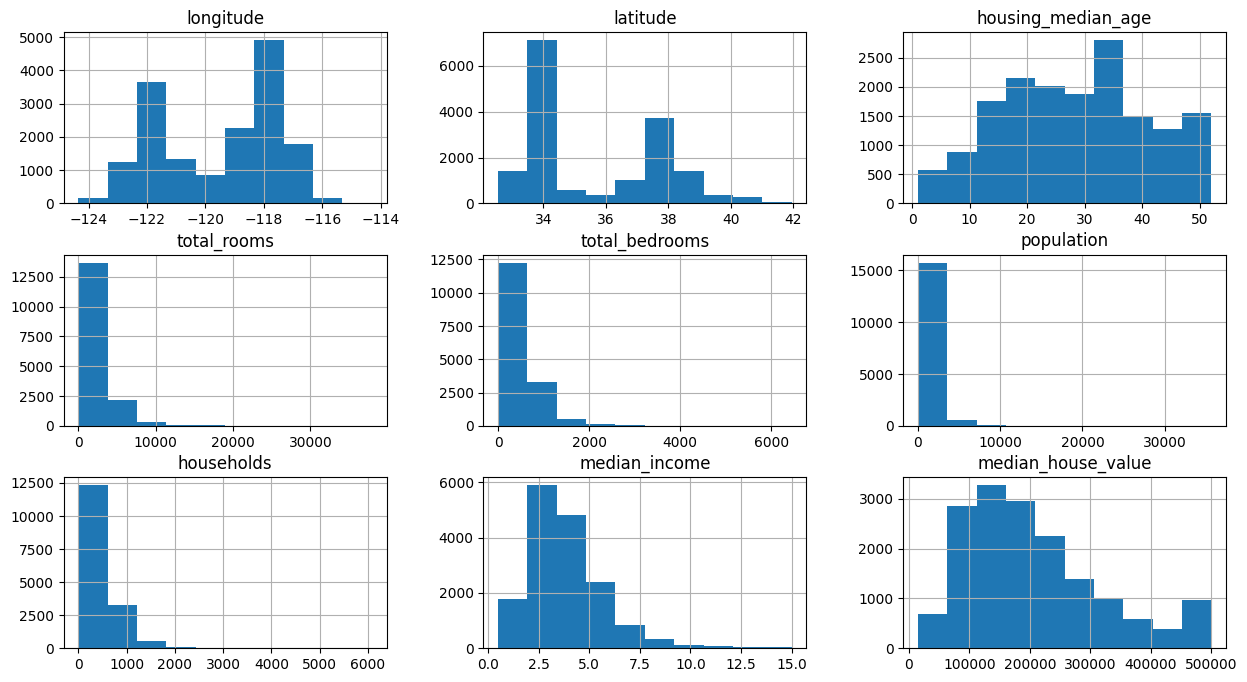

In [117]:
train_data.hist(figsize = (15,8))

In [118]:
numeric_train_data = train_data.select_dtypes(include=['float64', 'int64'])
numeric_train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925941,-0.111335,0.045886,0.067941,0.101524,0.055724,-0.009062,-0.042275
latitude,-0.925941,1.000000,0.016633,-0.040316,-0.069062,-0.112199,-0.072960,-0.085388,-0.146535
housing_median_age,-0.111335,0.016633,1.000000,-0.355748,-0.315994,-0.291776,-0.300146,-0.118766,0.102324
total_rooms,0.045886,-0.040316,-0.355748,1.000000,0.930670,0.859031,0.921137,0.198720,0.135079
total_bedrooms,0.067941,-0.069062,-0.315994,0.930670,1.000000,0.878490,0.981592,-0.005153,0.054056
population,0.101524,-0.112199,-0.291776,0.859031,0.878490,1.000000,0.906056,0.004545,-0.021917
households,0.055724,-0.072960,-0.300146,0.921137,0.981592,0.906056,1.000000,0.015482,0.068324
median_income,-0.009062,-0.085388,-0.118766,0.198720,-0.005153,0.004545,0.015482,1.000000,0.687420
median_house_value,-0.042275,-0.146535,0.102324,0.135079,0.054056,-0.021917,0.068324,0.687420,1.000000


<Axes: >

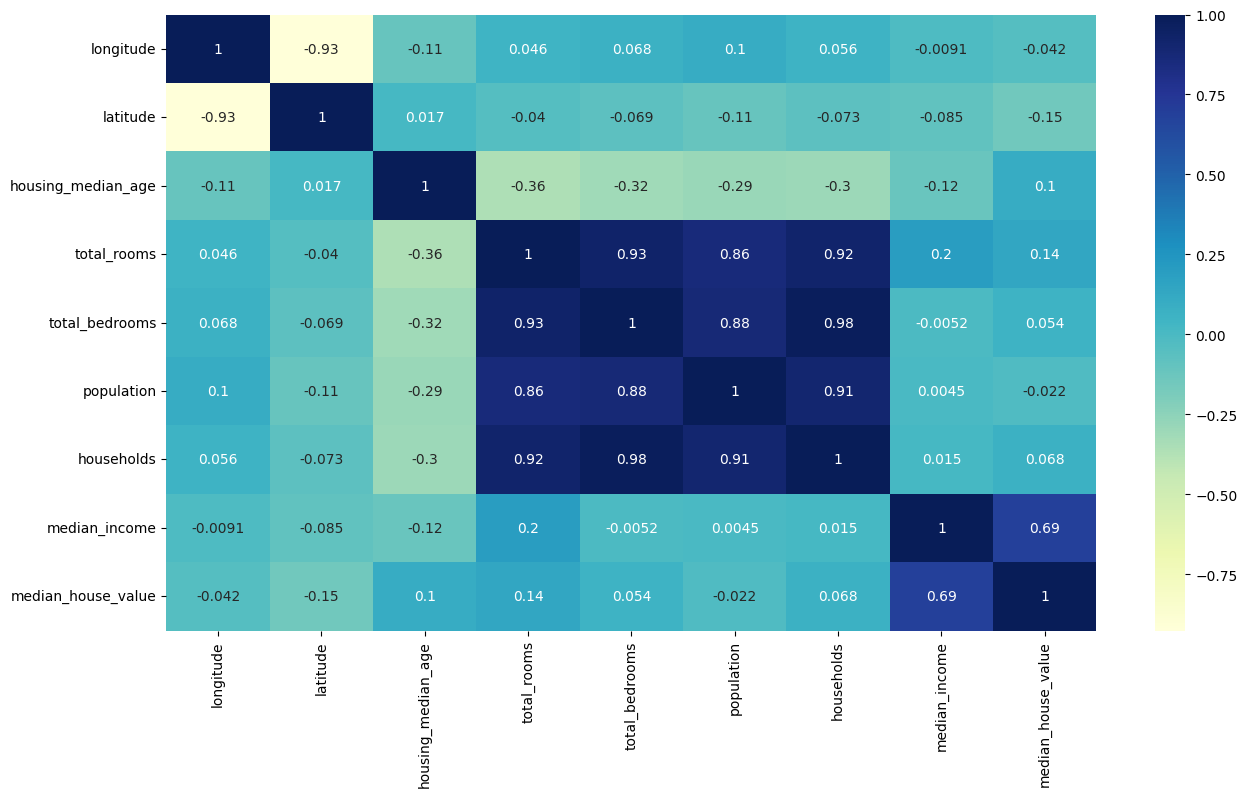

In [119]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_train_data.corr(),annot = True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

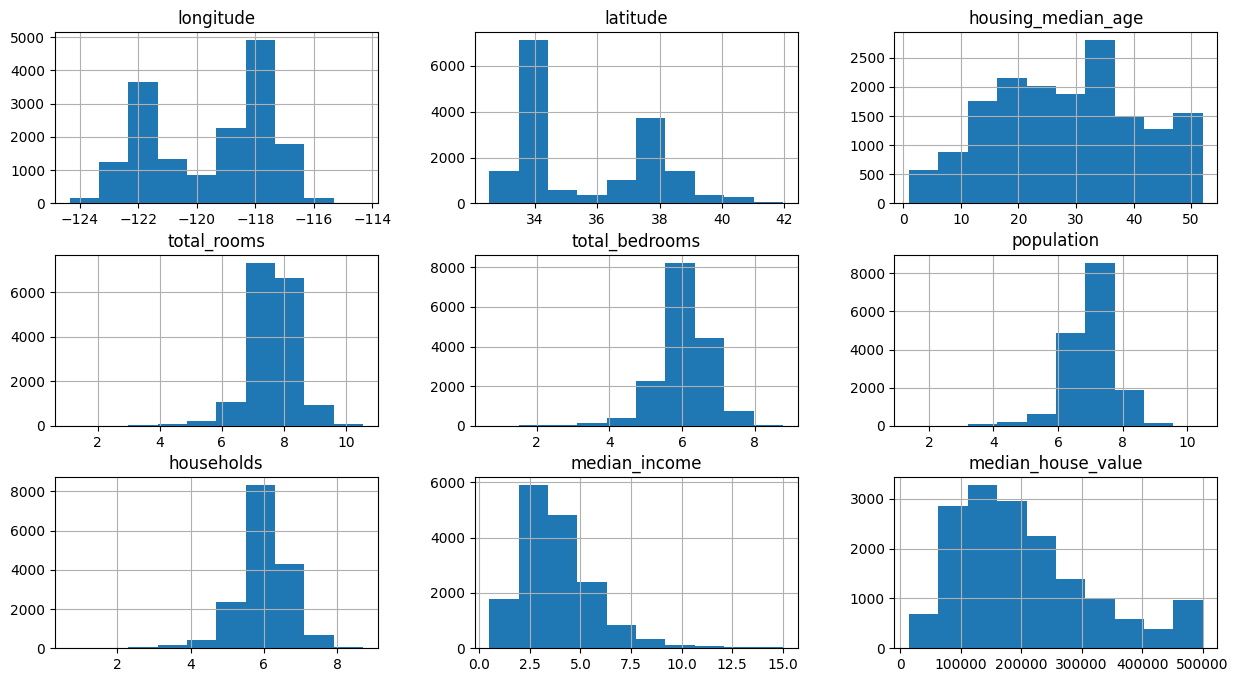

In [120]:
numeric_train_data["total_rooms"] = np.log(numeric_train_data["total_rooms"] + 1)
numeric_train_data["total_bedrooms"] = np.log(numeric_train_data["total_bedrooms"] + 1)
numeric_train_data["population"] = np.log(numeric_train_data["population"] + 1)
numeric_train_data["households"] = np.log(numeric_train_data["households"] + 1)

numeric_train_data.hist(figsize = (15,8))

In [121]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis = 1)
train_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8048,-118.17,33.84,45.0,1853.0,328.0,945.0,320.0,5.0787,219200.0,True,False,False,False,False
9399,-122.56,37.90,48.0,1550.0,253.0,641.0,276.0,8.6340,463500.0,False,False,False,True,False
4521,-118.21,34.04,36.0,1825.0,479.0,2097.0,480.0,2.1862,135300.0,True,False,False,False,False
18193,-122.03,37.39,22.0,3280.0,933.0,1842.0,795.0,4.4107,232700.0,True,False,False,False,False
12861,-121.38,38.70,25.0,3919.0,764.0,2203.0,783.0,2.2402,89500.0,False,True,False,False,False


<Axes: >

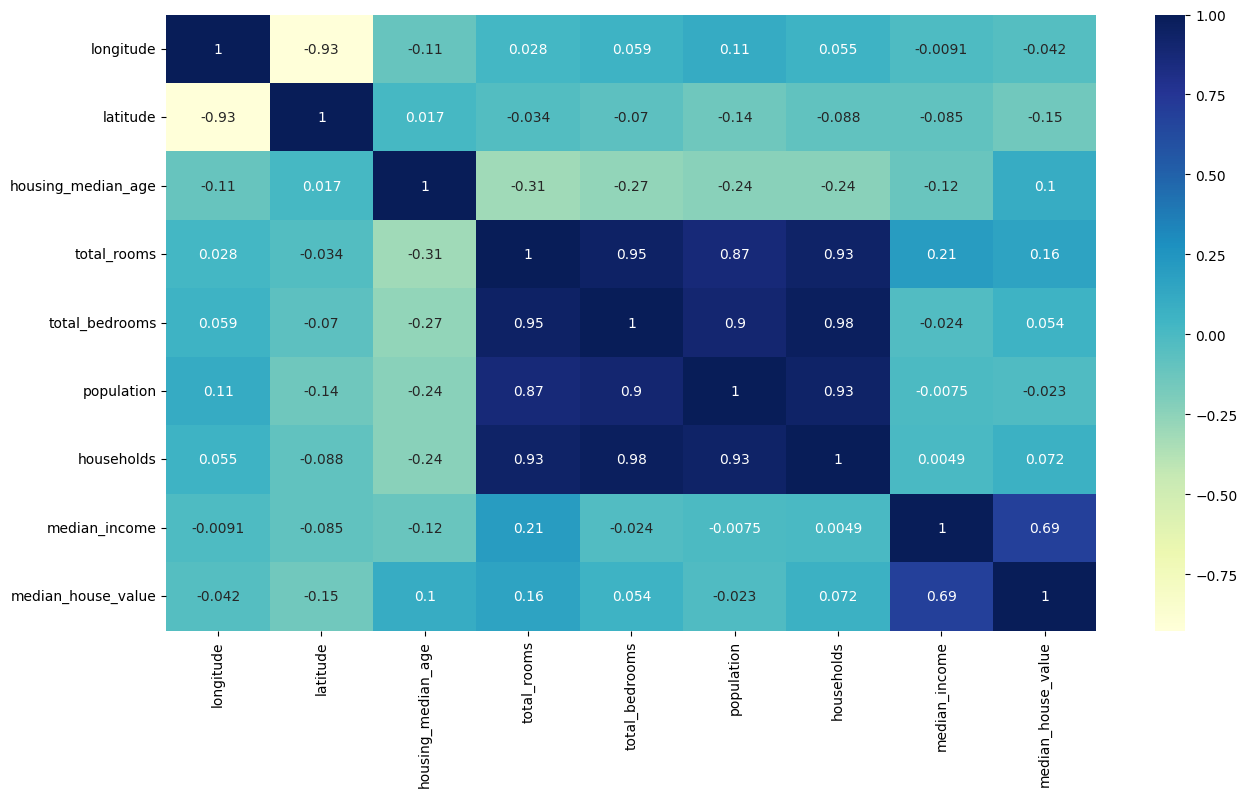

In [122]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_train_data.corr(),annot = True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

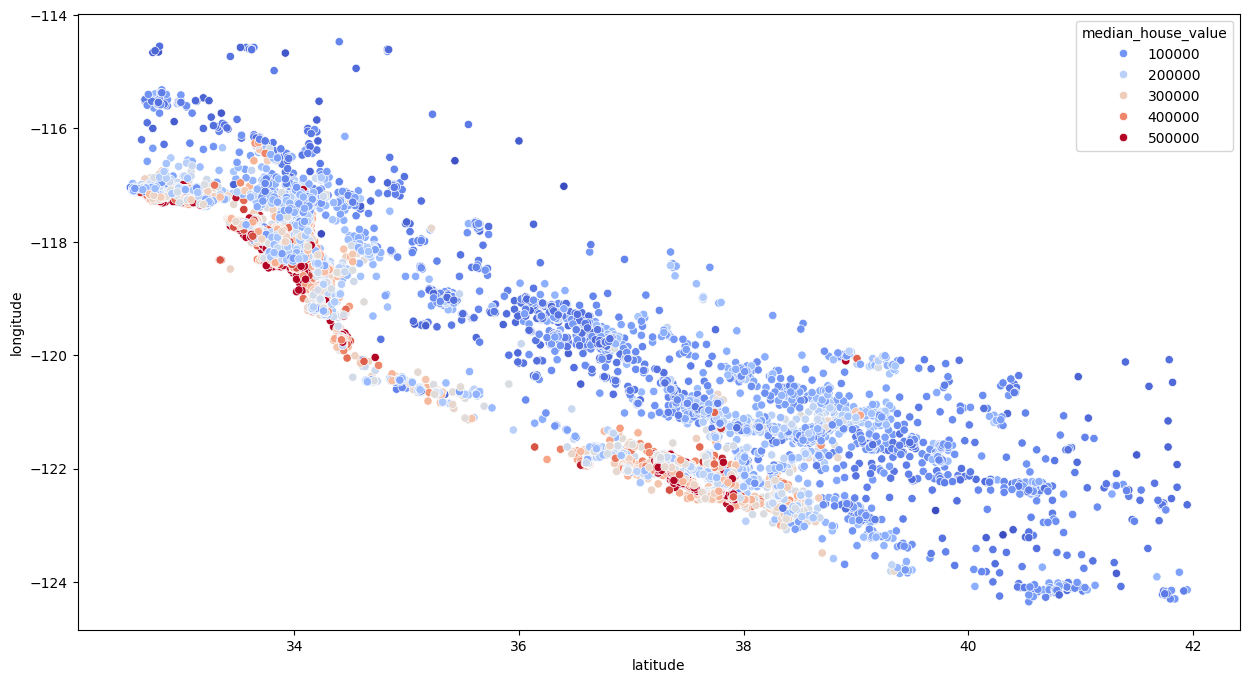

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude",y = "longitude",data = train_data,palette="coolwarm",hue="median_house_value")

<Axes: >

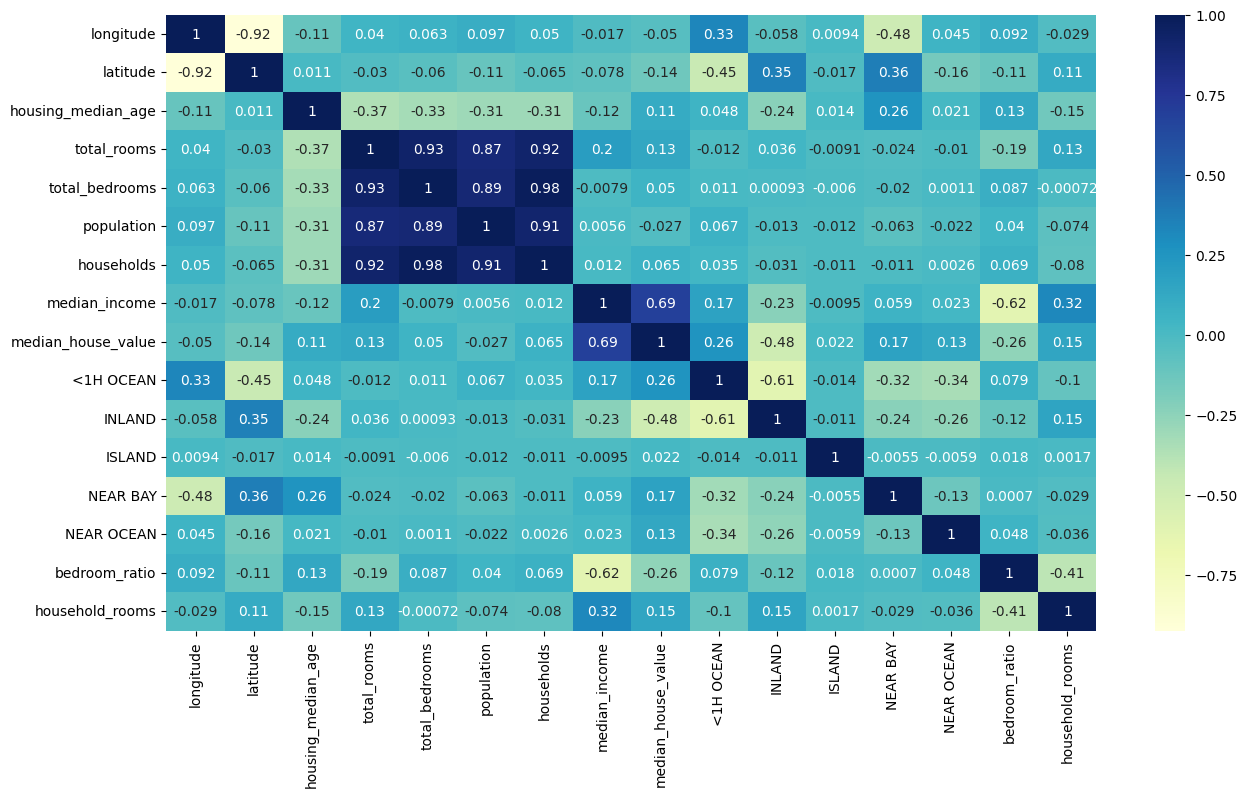

In [107]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")